In [1]:
%%capture
import logging
from pathlib import Path

if Path.cwd().stem == "notebooks":
    %cd ..
    %load_ext autoreload
    %autoreload 2


In [2]:
import json
import os
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from dotenv import load_dotenv
from polars import col

from src.plots.plot_seed_stability import (
    extract_final_test_accuracies,
    load_results,
    plot_hist,
    summarize,
)

load_dotenv()
FIGURE_DIR = Path(os.getenv("FIGURE_DIR"))


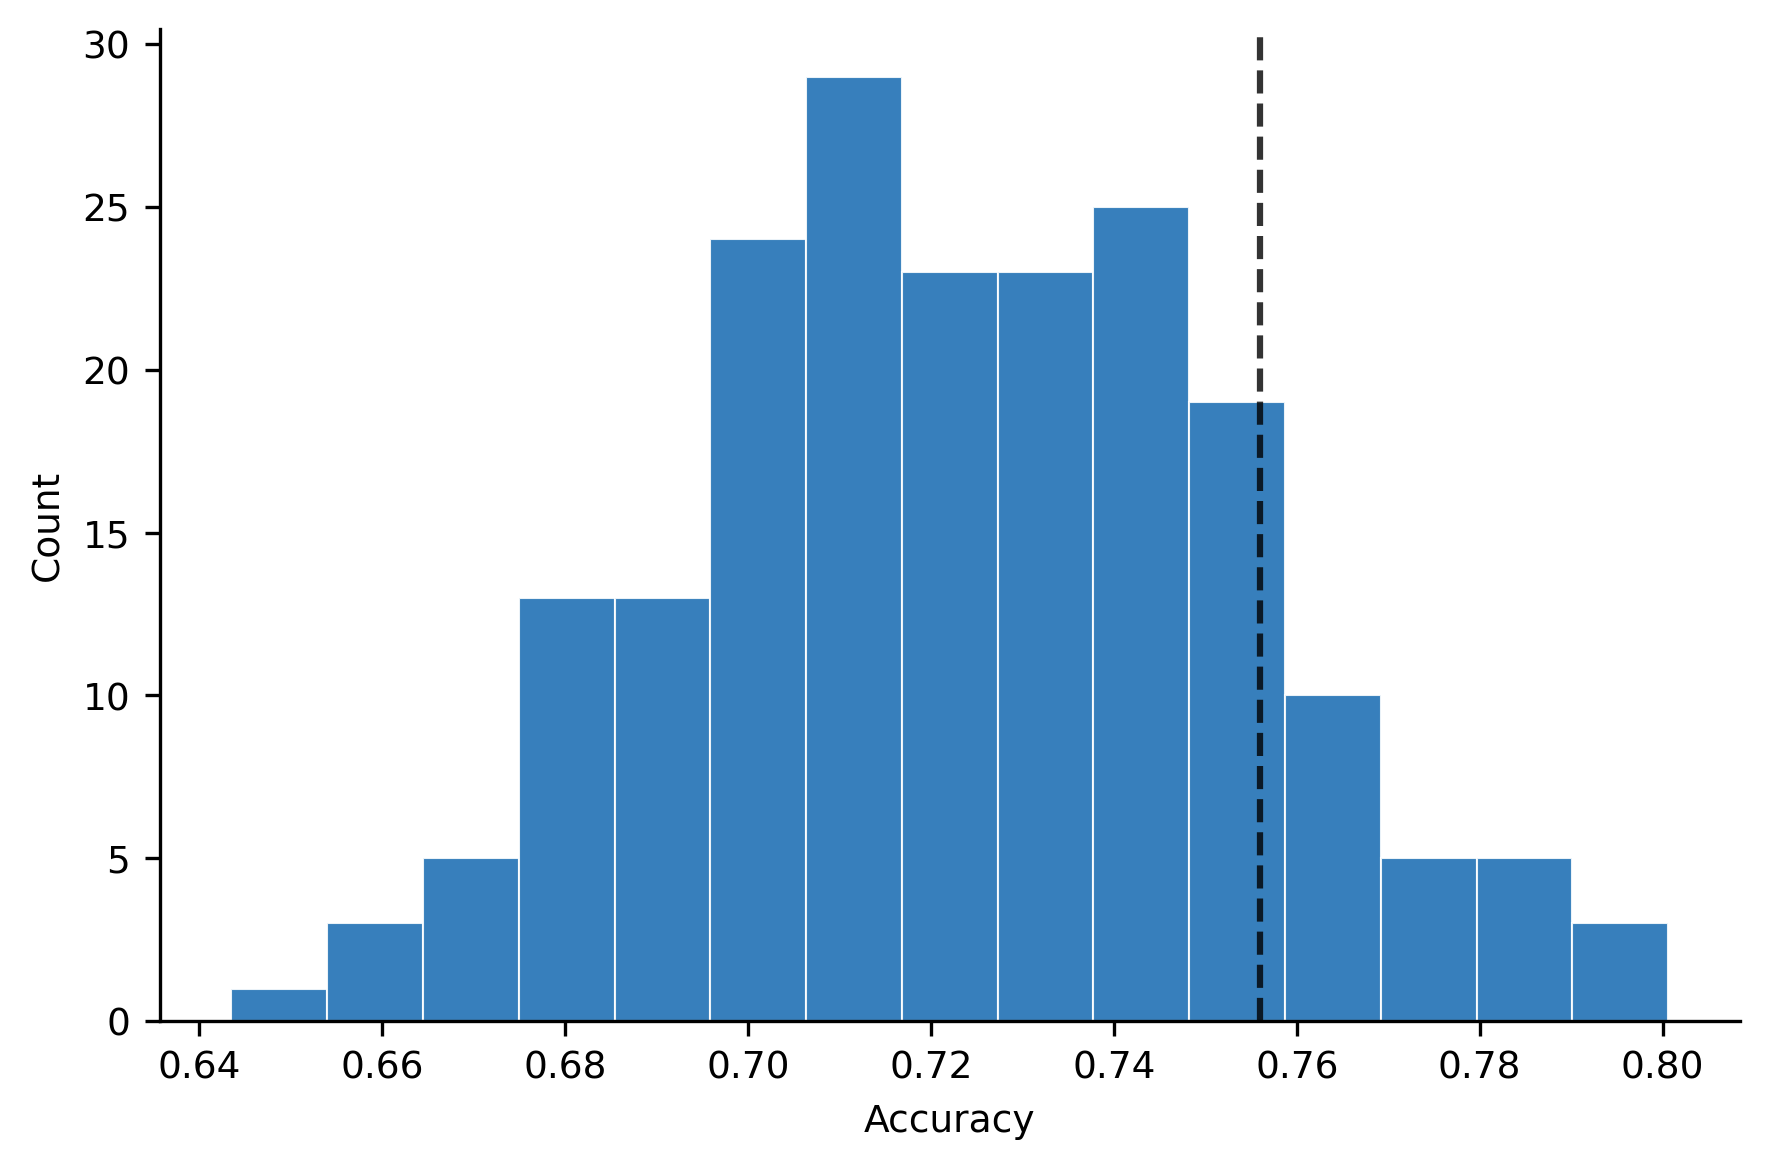

In [3]:
acc_42 = 0.756
data = load_results("results/experiment_eda_raw_heart_rate/stability_results.json")
vals = extract_final_test_accuracies(data)
fig = plot_hist(vals, bins=15, vline=acc_42)
fig.savefig(FIGURE_DIR / "stability_eda_hr.png", dpi=300, bbox_inches="tight")


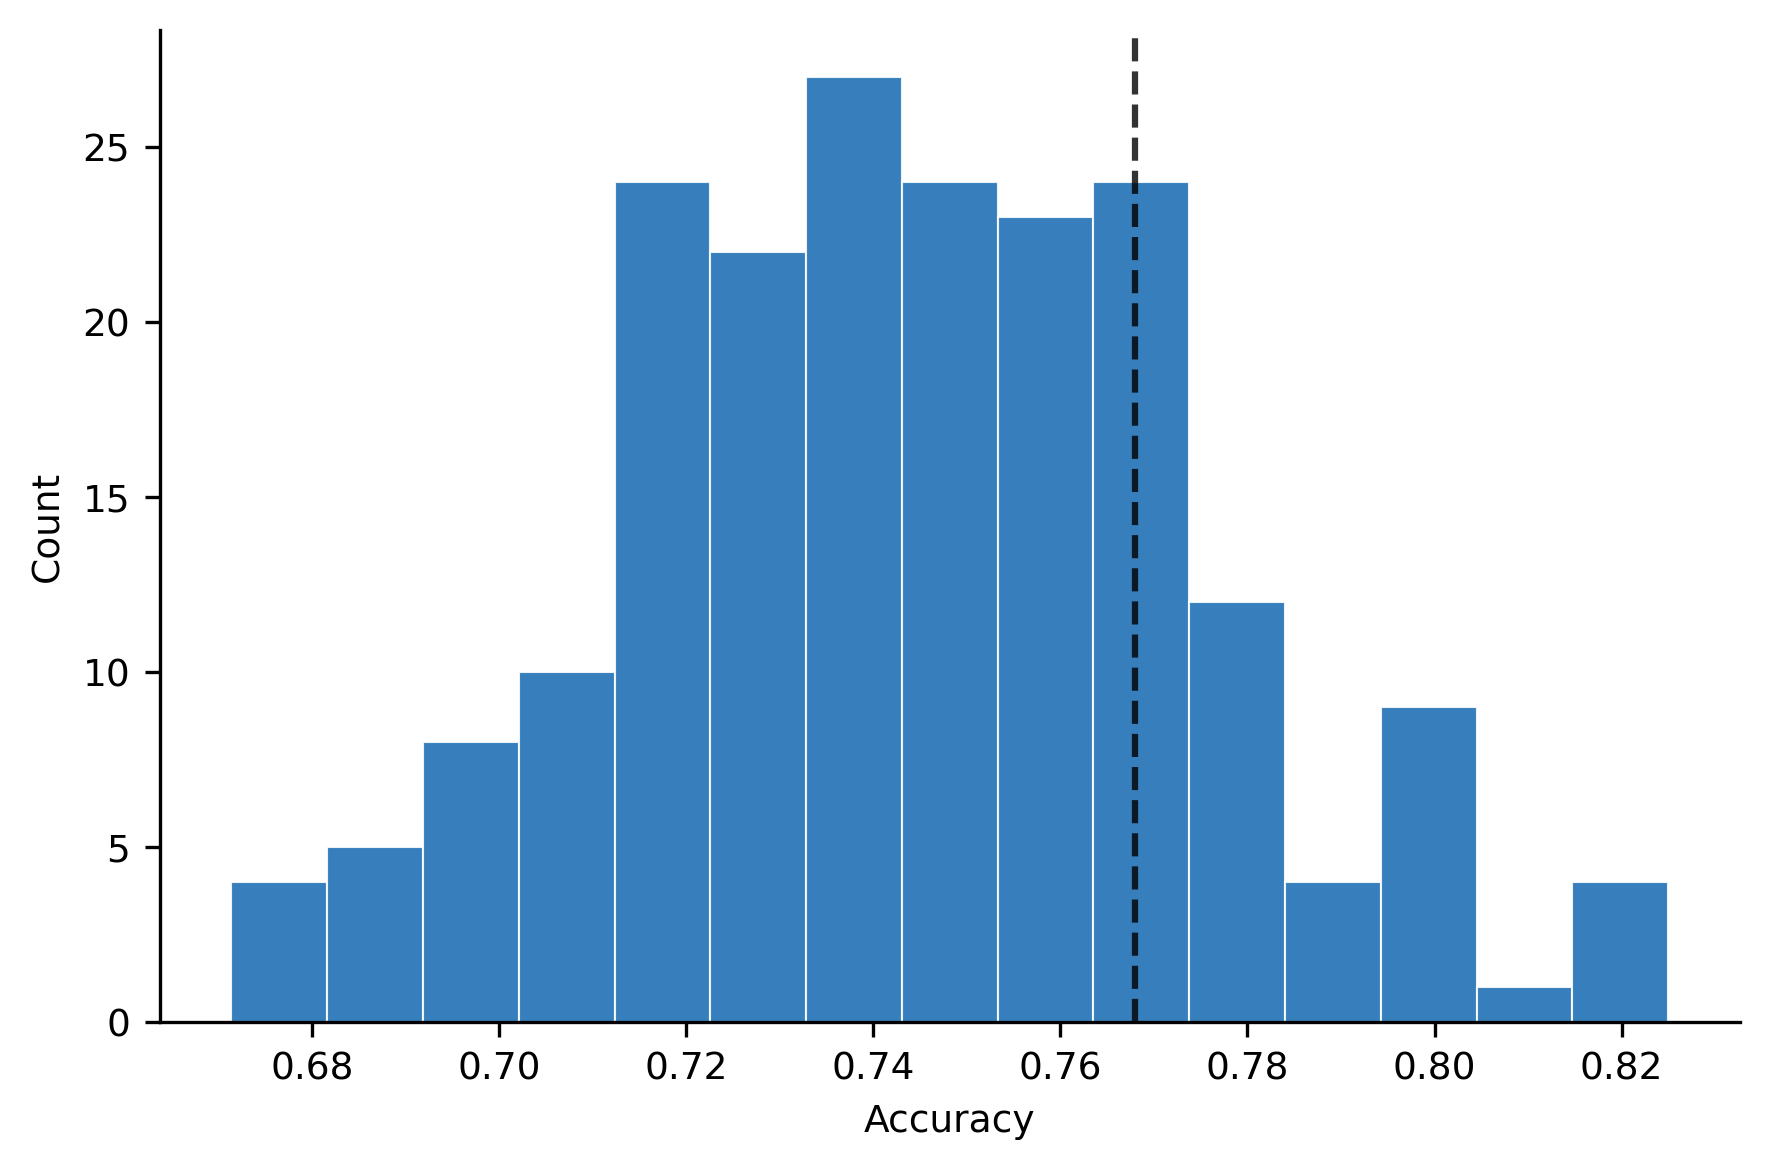

In [10]:
acc_42 = 0.768
data = load_results(
    "results/experiment_eda_raw_heart_rate_pupil/stability_results.json"
)
vals = extract_final_test_accuracies(data)
fig = plot_hist(vals, bins=15, vline=acc_42)
fig.savefig(FIGURE_DIR / "stability_eda_hr_pupil.png", dpi=300, bbox_inches="tight")


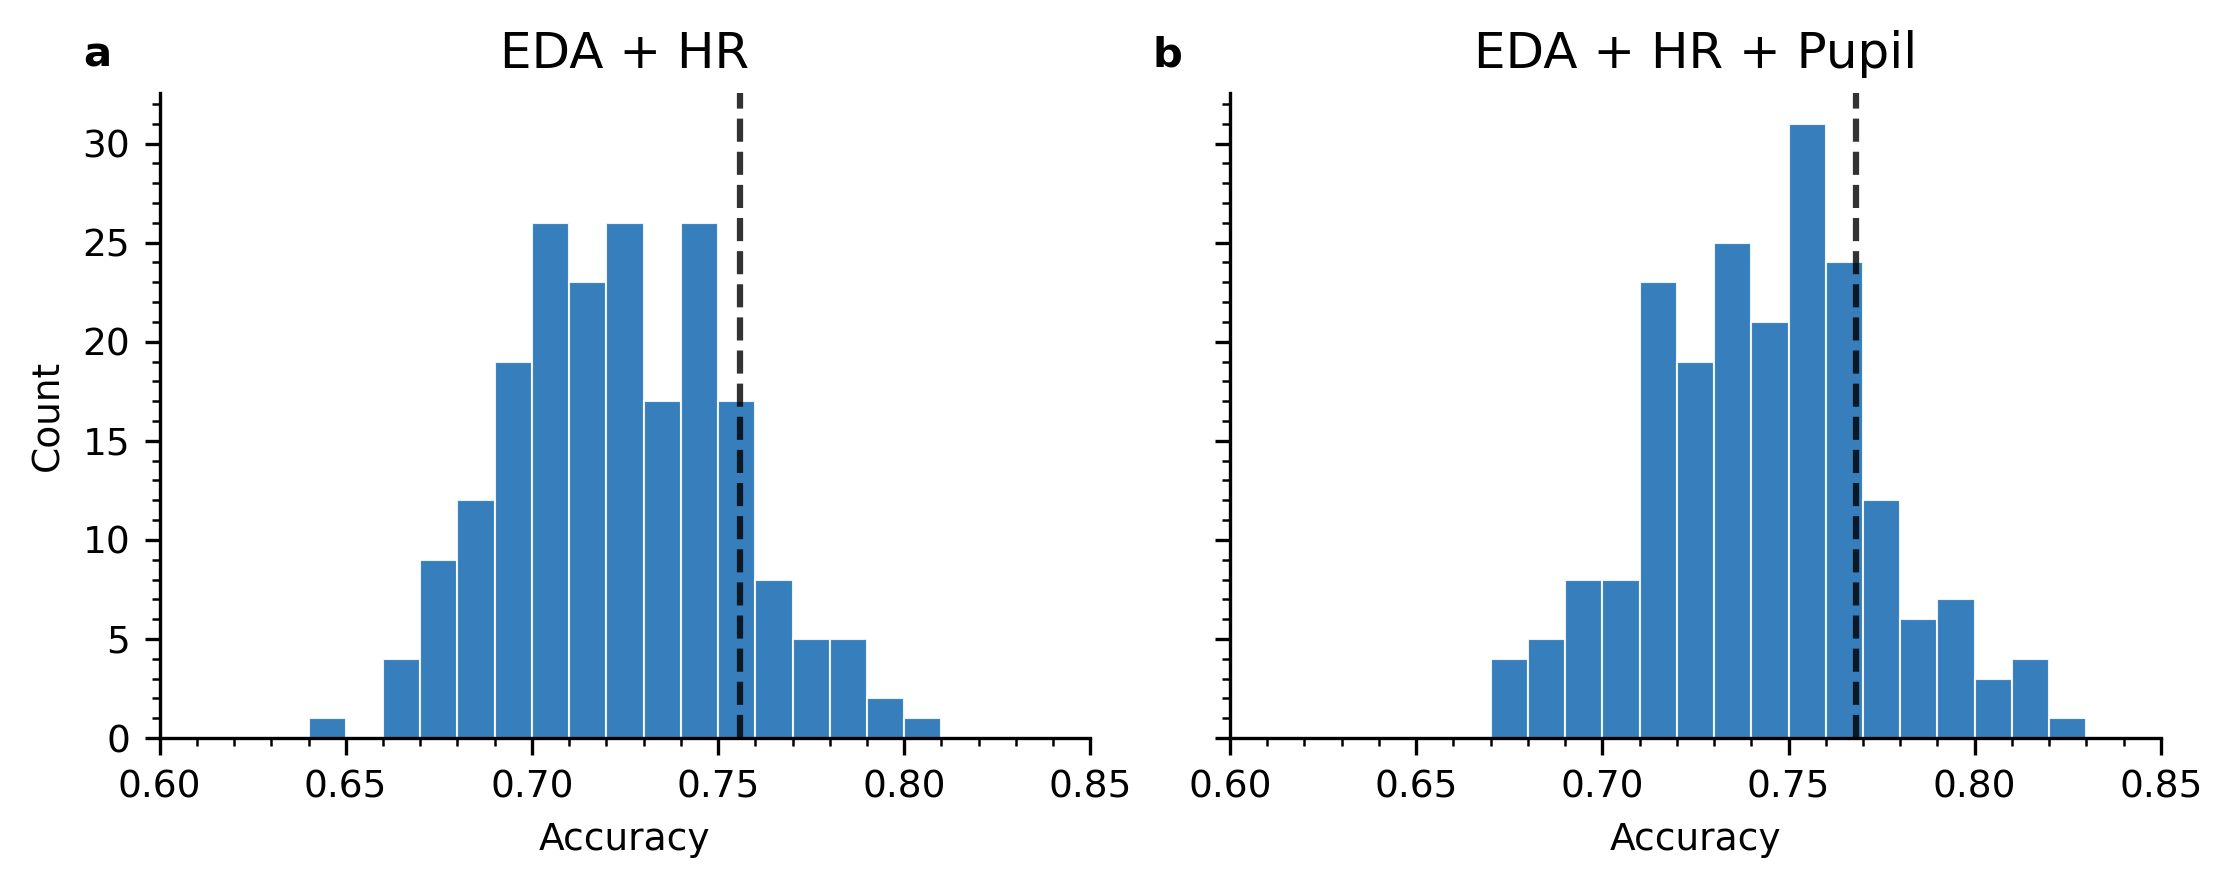

In [11]:
# Combined histogram figure with panel labels a and b (outside axes, original style)
acc1 = 0.756
data1 = load_results("results/experiment_eda_raw_heart_rate/stability_results.json")
vals1 = extract_final_test_accuracies(data1)

acc2 = 0.768
data2 = load_results(
    "results/experiment_eda_raw_heart_rate_pupil/stability_results.json"
)
vals2 = extract_final_test_accuracies(data2)

# Shared bins for fair comparison (15 bins) — align to snapped x-limits
data_min = float(min(min(vals1), min(vals2)))
data_max = float(max(max(vals1), max(vals2)))

# Snap limits to neat 0.05 steps
step = 0.05
xmin = np.floor(data_min / step) * step
xmax = np.ceil(data_max / step) * step

bin_width = 0.01
n_bins = int(np.round((xmax - xmin) / bin_width))
bins = np.linspace(xmin, xmax, n_bins + 1)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# Ensure both panels share identical limits
for ax in axes:
    ax.set_xlim(xmin, xmax)


def _hist_on_ax(ax, vals, vline=None, title=None):
    ax.hist(
        vals,
        bins=bins,
        color="#2171b5",
        edgecolor="white",
        alpha=0.9,
        linewidth=0.5,
    )
    # Match spines from plot_hist
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_linewidth(0.8)
    ax.spines["bottom"].set_linewidth(0.8)
    if vline is not None:
        ax.axvline(vline, color="black", linestyle="--", linewidth=1.5, alpha=0.8)
    if title:
        ax.set_title(title)
    ax.set_xlabel("Accuracy")
    # x-ticks: major every 0.05, minor every 0.01 (no labels on minor)
    ax.minorticks_on()
    ax.xaxis.set_major_locator(mticker.MultipleLocator(0.05))
    ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.01))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter("%.2f"))
    ax.tick_params(axis="x", which="major", length=4)
    ax.tick_params(axis="x", which="minor", length=2)


# Panel a
_hist_on_ax(axes[0], vals1, vline=acc1, title="EDA + HR")
axes[0].set_ylabel("Count")

# Panel b
_hist_on_ax(axes[1], vals2, vline=acc2, title="EDA + HR + Pupil")

# Layout first, then place labels using final axes positions
plt.tight_layout()
fig.subplots_adjust(left=0.13, top=0.9, wspace=0.15)

bbox0 = axes[0].get_position()
bbox1 = axes[1].get_position()
pad_x, pad_y = 0.02, 0.02  # move left of ticks and above axes
fig.text(
    bbox0.x0 - pad_x, bbox0.y1 + pad_y, "a", ha="right", va="bottom", fontweight="bold"
)
fig.text(
    bbox1.x0 - pad_x, bbox1.y1 + pad_y, "b", ha="right", va="bottom", fontweight="bold"
)

fig.savefig(FIGURE_DIR / "stability_combined.png", dpi=300, bbox_inches="tight")

In [19]:
summarize(vals1)

{'mean': 0.7238282186495207,
 'std': 0.030087352287172315,
 'min': 0.64349376114082,
 'max': 0.8006088280060882,
 'range': 0.15711506686526822}

In [20]:
summarize(vals2)

{'mean': 0.7437926773653845,
 'std': 0.030614961662778675,
 'min': 0.6714060031595577,
 'max': 0.8249619482496194,
 'range': 0.15355594509006176}